# Autoencoders

Autoencoders are not a new concept and have been on the market for a really long time. They are just built on top of the typical neural network but aims to learn the underlying process, that is being modeled, by finding a proper coding, which is typically represented in lower-dimensional space.

## Neural networks for classification

In classification problems, we typically have a training dataset consisting of the observations along with the target labels. To train the network we need to iteratively feed it with the observations as input and labels as the desired output. The training process aims to optimize so-called loss function, which is a measurement of how the network is able to correctly map the input to output.

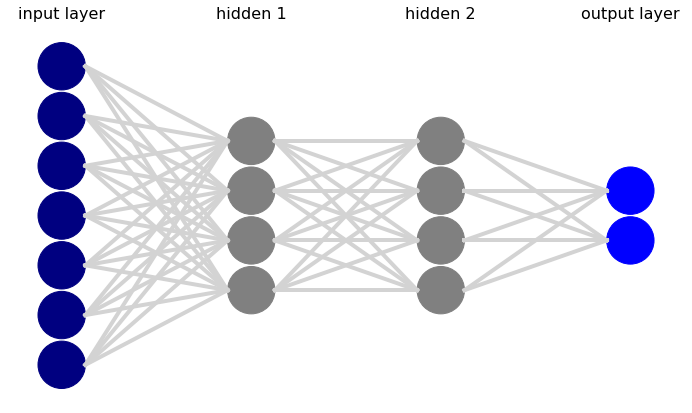

(<Figure size 1440x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3744e47b00>)

In [15]:
%matplotlib inline

import nnv

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 7)

layers = [
    {"title":"input layer", "units": 7, "color": "navy"},
    {"title":"hidden 1", "units": 4},
    {"title":"hidden 2", "units": 4},
    {"title":"output layer", "units": 2,"color": "blue"},
]

nnv.NNV(layers, max_num_nodes_visible=8, 
        node_radius=10, spacing_layer=60, font_size=16)\
    .render()

## Neural networks for autoencoding

In autoencoding problems, we choose one of the hidden layers, intended to represent a coding we're looking for. Instead of looking at the input and output, we pay most of the attention to the selected hidden layer.

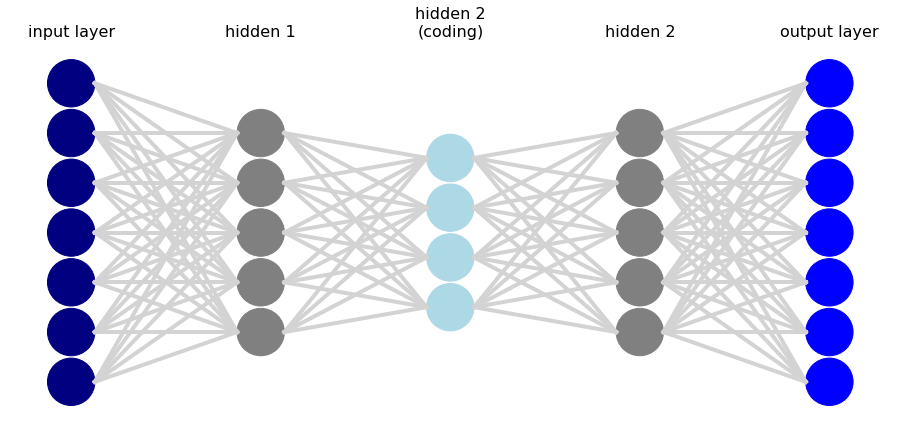

(<Figure size 1440x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f37443c6898>)

In [16]:
layers = [
    {"title":"input layer", "units": 7, "color": "navy"},
    {"title":"hidden 1", "units": 5},
    {"title":"hidden 2\n(coding)", "units": 4, "color": "lightBlue"},
    {"title":"hidden 2", "units": 5},
    {"title":"output layer", "units": 7, "color": "blue"},
]

nnv.NNV(layers, max_num_nodes_visible=8, 
        node_radius=10, spacing_layer=60, font_size=16)\
    .render()

The left side of the network is usually called *encoder* as it tries to learn how to encode given input into the latent space, while the right side, a *decoder* performs the same process backwards.

### Autoencoders in anomaly detection

It may seem not obvious how autoencoders might be used for anomaly detection. However, the idea behind is really simple. As we train the network to reconstruct the observations in the best possible manner, we should expect the reconstructed observations to be rather close to the original ones. The training phase aims to optimize the loss function, which measures how well the mapping was done because we put the same values for both the input and output of the network. One can simply calculate the value of the same loss function for the new observations and perform the thresholding to recognize if the value is significantly higher/lower than it was for the training dataset. There is an assumption, we train the network only on the observations we believe were typical for the modelled process, as there is no way to mark the anomalies during the training.

## Example 1. Autoencoders for anomaly detection

We will consider a simple example of a problem where the data is not normally distributed, so the simplest methods cannot be directly used. Additionally, we will consider a problem where the variables are dependent to each other, but the dependency is not linear.

In [46]:
import pandas as pd
import numpy as np

x = np.linspace(-np.pi, np.pi, 10000)
dataset = pd.DataFrame.from_dict({"x": x, 
                                  "sin": np.sin(x), 
                                  "cos": np.cos(x)})
dataset.corr()

,x,sin,cos
x,1.000000e+00,7.795798e-01,-2.214314e-16
sin,7.795798e-01,1.000000e+00,-3.080805e-17
cos,-2.214314e-16,-3.080805e-17,1.000000e+00


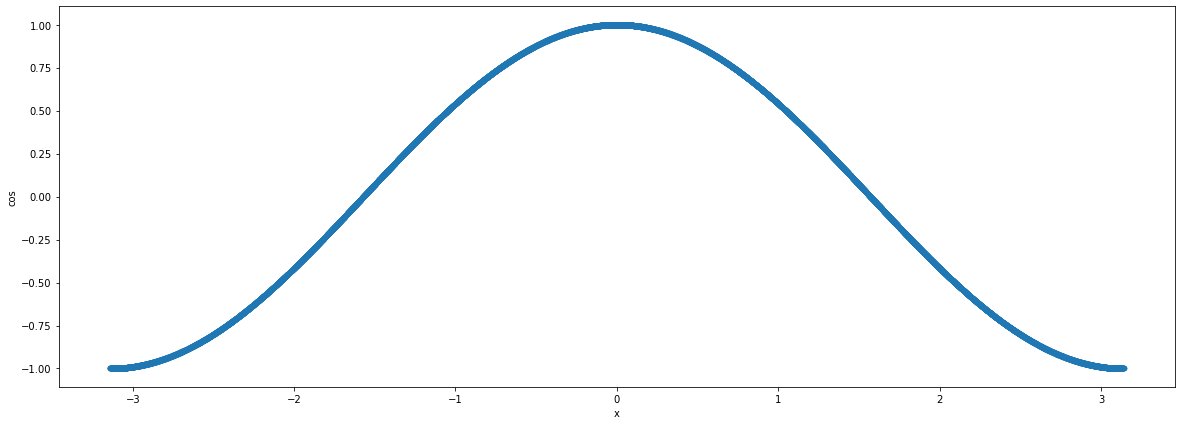

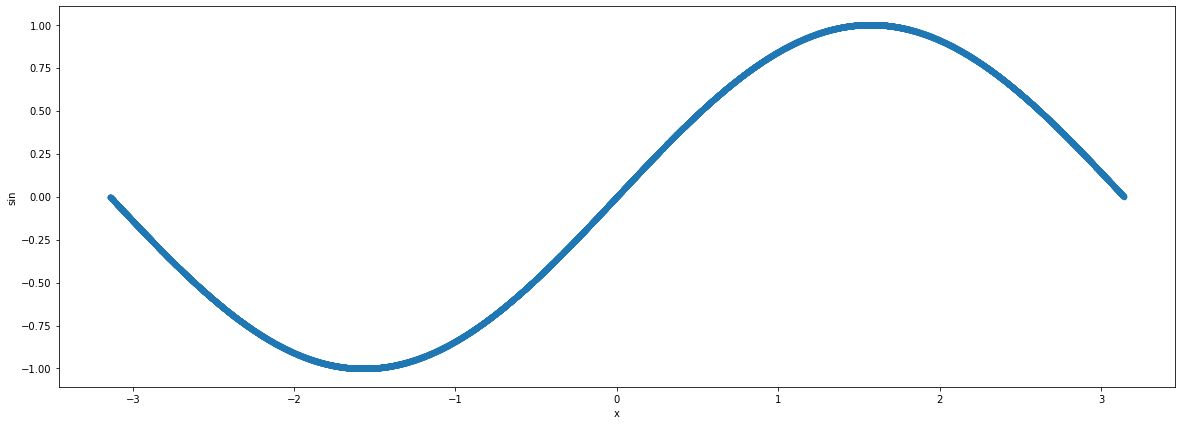

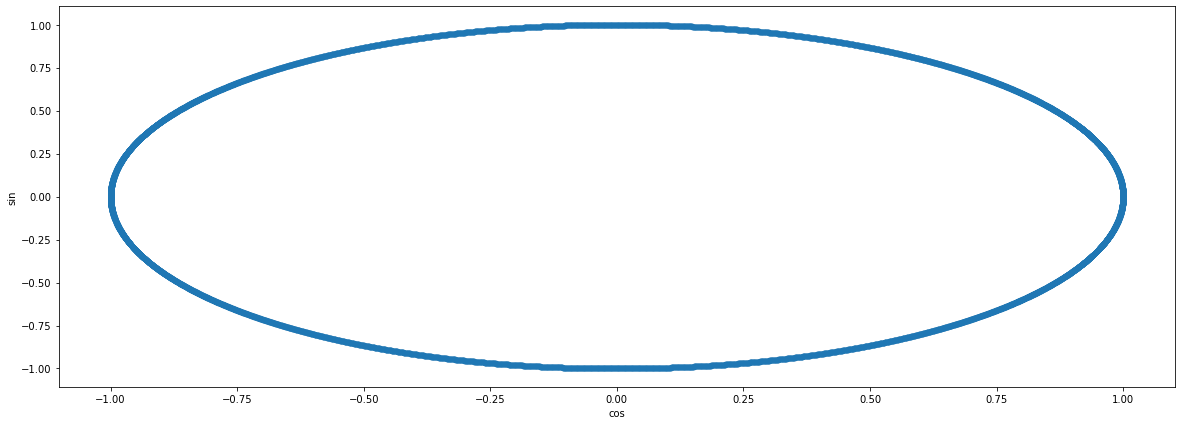

In [50]:
dataset.plot.scatter(x="x", y="cos"), 
dataset.plot.scatter(x="x", y="sin"), 
dataset.plot.scatter(x="cos", y="sin")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36bc1f0048>,
      dtype=object)

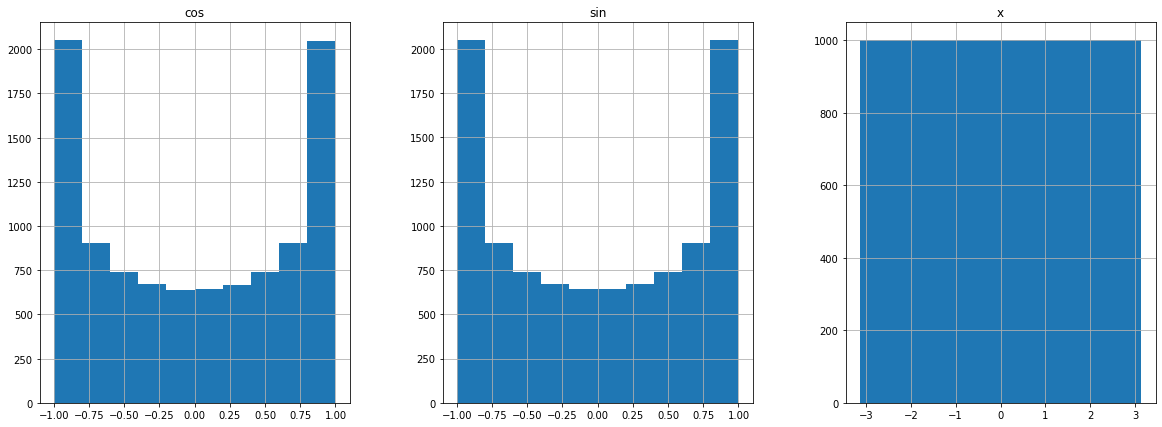

In [95]:
dataset.hist(layout=(1, 3))

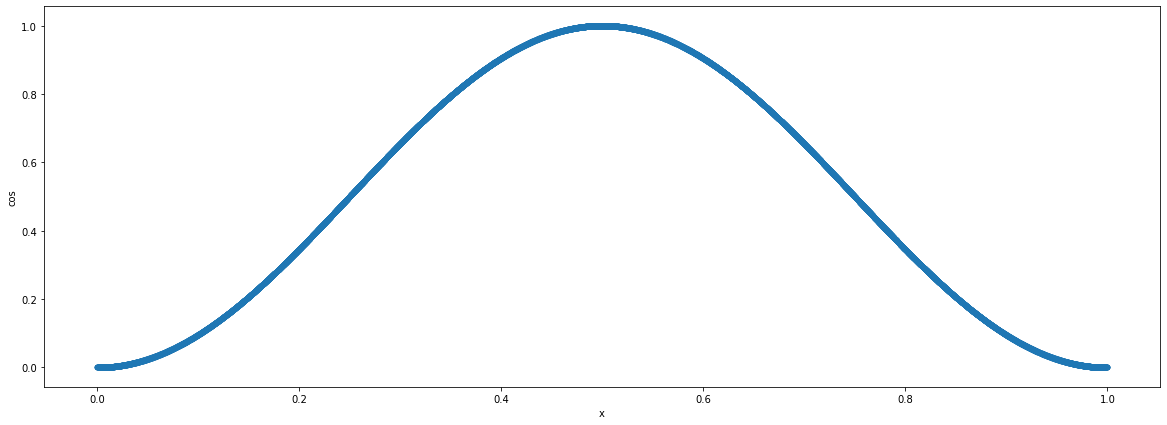

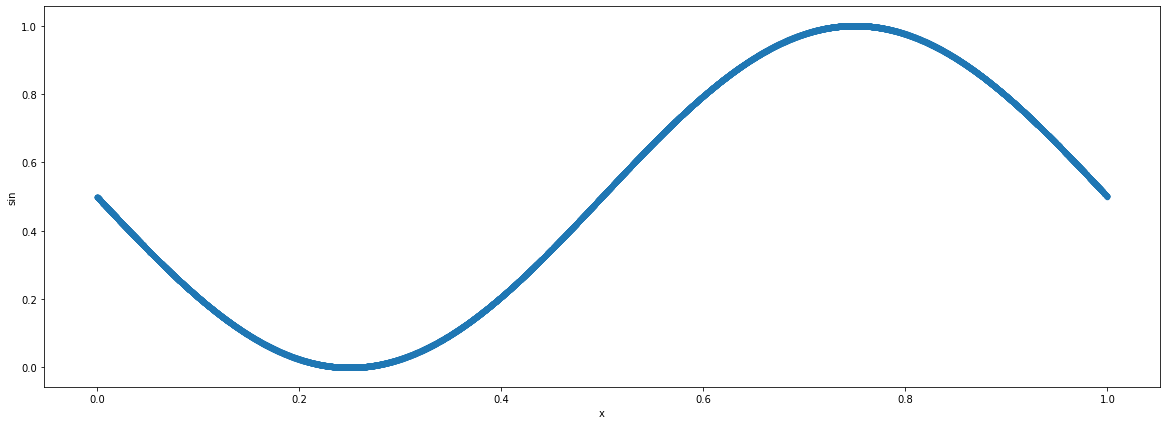

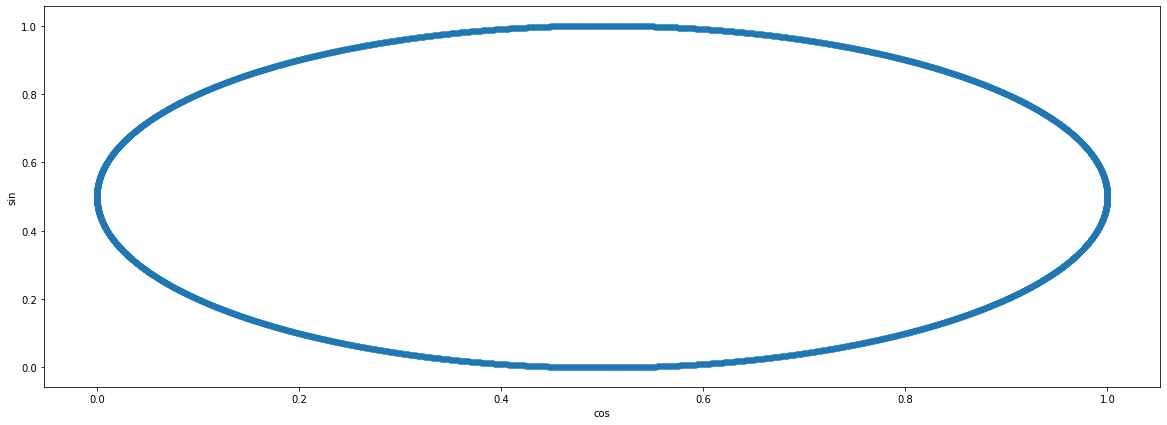

In [136]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
dataset_scaled = pd.DataFrame(min_max_scaler.fit_transform(dataset), 
                              columns=dataset.columns)
dataset_scaled.plot.scatter(x="x", y="cos"), 
dataset_scaled.plot.scatter(x="x", y="sin"), 
dataset_scaled.plot.scatter(x="cos", y="sin")

### Autoencoder definition and training

TBD: description

In [174]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(3, ))
hidden_1 = Dense(6, activation="tanh")(input_layer)
encoded = Dense(2, activation="tanh")(hidden_1)
hidden_2 = Dense(6, activation="tanh")(encoded)
decoded = Dense(3, activation="sigmoid")(hidden_2)
autoencoder = Model(input_layer, decoded)

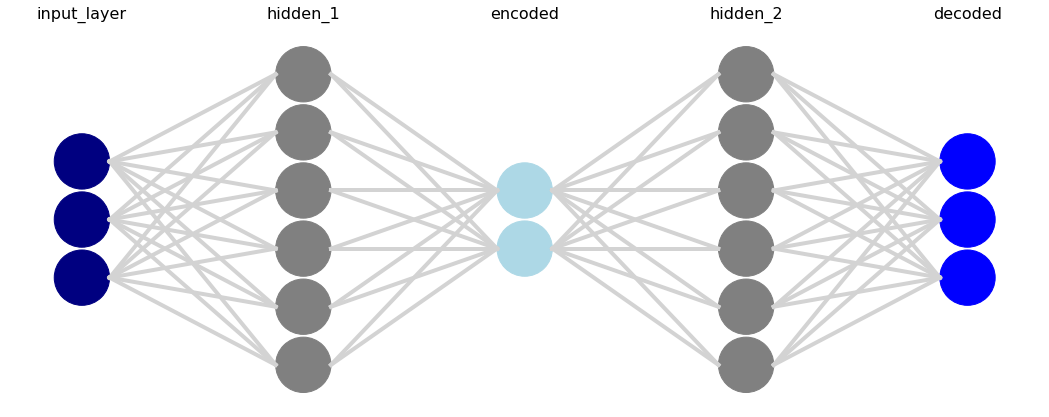

(<Figure size 1440x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f365f619ef0>)

In [211]:
layers = [
    {"title":"input_layer", "units": 3, "color": "navy"},
    {"title":"hidden_1", "units": 6},
    {"title":"encoded", "units": 2, "color": "lightBlue"},
    {"title":"hidden_2", "units": 6},
    {"title":"decoded", "units": 3, "color": "blue"},
]

nnv.NNV(layers, max_num_nodes_visible=8, 
        node_radius=10, spacing_layer=60, font_size=16)\
    .render()

In [178]:
autoencoder.compile(optimizer="adam", 
                    loss="mean_squared_error")

In [179]:
autoencoder.fit(dataset_scaled, dataset_scaled,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(dataset_scaled, dataset_scaled))

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 101us/step - loss: 0.0107 - val_loss: 0.0092
Epoch 2/100
10000/10000 [==============================] - 0s 13us/step - loss: 0.0087 - val_loss: 0.0081
Epoch 3/100
10000/10000 [==============================] - 0s 14us/step - loss: 0.0078 - val_loss: 0.0074
Epoch 4/100
10000/10000 [==============================] - 0s 14us/step - loss: 0.0071 - val_loss: 0.0067
Epoch 5/100
10000/10000 [==============================] - 0s 15us/step - loss: 0.0064 - val_loss: 0.0060
Epoch 6/100
10000/10000 [==============================] - 0s 18us/step - loss: 0.0056 - val_loss: 0.0052
Epoch 7/100
10000/10000 [==============================] - 0s 17us/step - loss: 0.0048 - val_loss: 0.0043
Epoch 8/100
10000/10000 [==============================] - 0s 17us/step - loss: 0.0039 - val_loss: 0.0036
Epoch 9/100
10000/10000 [==============================] - 0s 21us/step - loss: 0.0033 - val_loss: 0.

10000/10000 [==============================] - 0s 13us/step - loss: 2.3453e-04 - val_loss: 2.3530e-04
Epoch 74/100
10000/10000 [==============================] - 0s 12us/step - loss: 2.3324e-04 - val_loss: 2.3543e-04
Epoch 75/100
10000/10000 [==============================] - 0s 12us/step - loss: 2.3222e-04 - val_loss: 2.3279e-04
Epoch 76/100
10000/10000 [==============================] - 0s 12us/step - loss: 2.3126e-04 - val_loss: 2.2853e-04
Epoch 77/100
10000/10000 [==============================] - 0s 12us/step - loss: 2.2880e-04 - val_loss: 2.2777e-04
Epoch 78/100
10000/10000 [==============================] - 0s 12us/step - loss: 2.2751e-04 - val_loss: 2.2746e-04
Epoch 79/100
10000/10000 [==============================] - 0s 13us/step - loss: 2.2593e-04 - val_loss: 2.2510e-04
Epoch 80/100
10000/10000 [==============================] - 0s 12us/step - loss: 2.2547e-04 - val_loss: 2.2373e-04
Epoch 81/100
10000/10000 [==============================] - 0s 12us/step - loss: 2.2331e-04 -

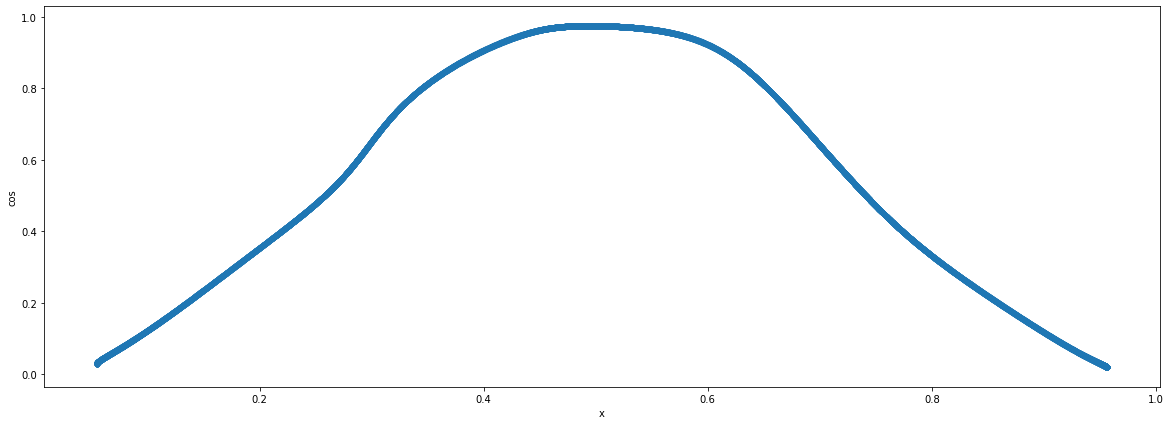

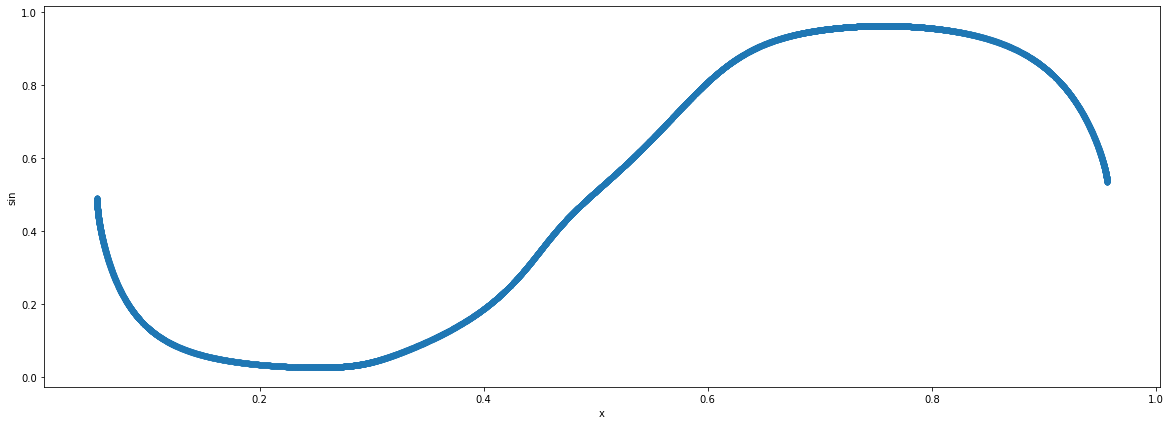

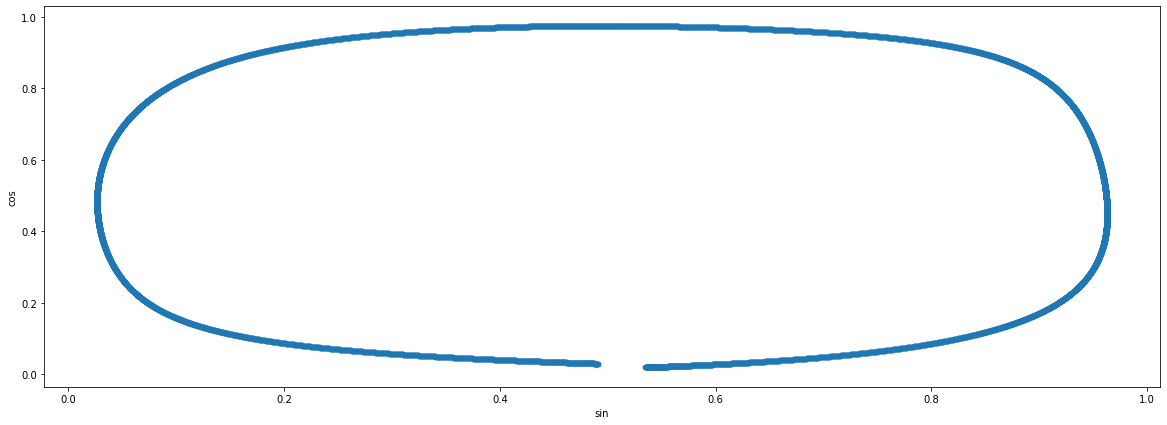

In [204]:
predicted_df = pd.DataFrame(autoencoder.predict(dataset_scaled), 
                            columns=dataset_scaled.columns)
predicted_df.plot.scatter(x="x", y="cos"),
predicted_df.plot.scatter(x="x", y="sin"),
predicted_df.plot.scatter(x="sin", y="cos")

### Detecting the anomaly

In this example, creating an anomaly is rather simple. Just by switching sine and cosine values, we should expect the autoencoder to increase the value of the loss function and not to be able to properly reproduce the observation. First of all, we can check how it looks like for training dataset, to adapt the threshold properly.

In [205]:
from keras.losses import mean_squared_error
from keras import backend as K

mse = K.eval(mean_squared_error(dataset_scaled, 
                                predicted_df))
mse_df = pd.DataFrame.from_dict({"mse": mse})
mse_df.describe()

,mse
count,10000.000000
mean,0.000205
std,0.000200
min,0.000002
25%,0.000064
50%,0.000164
75%,0.000253
max,0.001328


In [206]:
anomalies = pd.DataFrame.from_dict({"x": x, 
                                    "sin": np.cos(x),  # switched sine
                                    "cos": np.sin(x)}) # with cosine
anomalies_scaled = min_max_scaler.transform(anomalies)

predicted_df = pd.DataFrame(autoencoder.predict(anomalies_scaled), 
                            columns=dataset_scaled.columns)
anomalies_mse = K.eval(mean_squared_error(anomalies_scaled, 
                                          predicted_df))
anomalies_mse_df = pd.DataFrame.from_dict({"mse": anomalies_mse})
anomalies_mse_df.describe()

,mse
count,10000.000000
mean,0.042542
std,0.047122
min,0.000087
25%,0.005535
50%,0.016635
75%,0.079735
max,0.178636


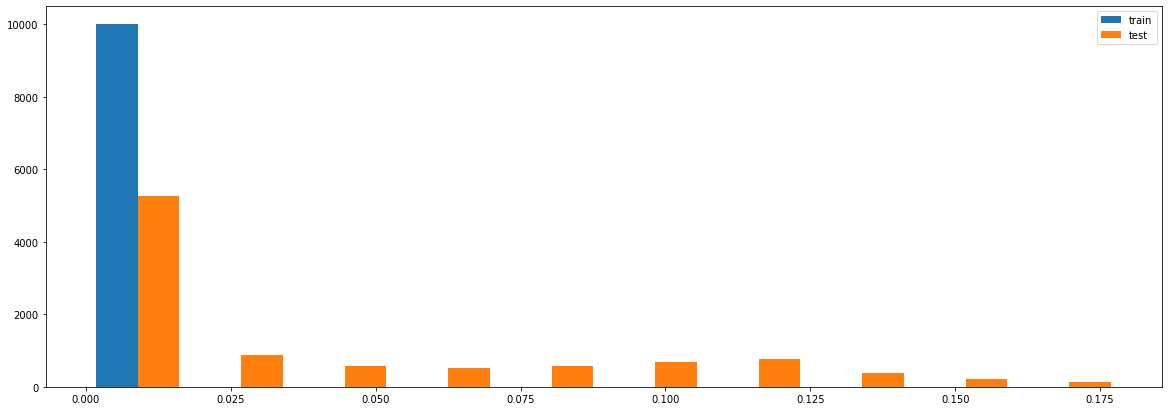

In [217]:
plt.hist([mse, anomalies_mse], 
         label=["train", "test"])
plt.legend(loc="upper right")
plt.show()